# Technical Analysis using Pandas library [pandas-ta](https://pypi.org/project/pandas-ta/)
## pandas-ta [documentation](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html)

In [1]:
import pandas as pd
import pandas_ta as pta
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import time
%matplotlib inline

In [2]:
metrics_eth = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/eth_annual_metrics/combined.csv', index_col='time')
metrics_eth = metrics_eth.reset_index()
metrics_eth['time'] = pd.to_datetime(metrics_eth['time']).dt.date
metrics_eth = metrics_eth.set_index('time').drop(columns='Unnamed: 0')

metrics_eth.tail()

,asset,AdrActCnt,CapMVRVCur,CapMrktCurUSD,HashRate,NVTAdj,PriceUSD,SplyCur,TxCnt,TxTfrValAdjUSD,VelCur1yr
time,,,,,,,,,,,
2021-12-13,eth,610120,1.698278,4.452681e+11,877.486094,37.563468,3788.082337,1.175445e+08,1242978,1.185375e+10,18.892499
2021-12-14,eth,617852,1.719872,4.526614e+11,878.316915,39.143196,3850.763308,1.175511e+08,1214900,1.156424e+10,18.881284
2021-12-15,eth,607024,1.773629,4.720652e+11,878.531504,47.901188,4015.642312,1.175566e+08,1258462,9.854978e+09,18.863606
2021-12-16,eth,601544,1.758465,4.671211e+11,857.226757,48.596247,3973.451095,1.175605e+08,1155456,9.612287e+09,18.833360
2021-12-17,eth,615024,1.731316,4.567951e+11,853.830893,51.870505,3885.430082,1.175662e+08,1270355,8.806451e+09,18.772575


# Relative Strength Index - RSI

In [3]:
rsi_eth = pta.rsi(metrics_eth['PriceUSD'],length=14).dropna()
rsi_eth
rsi_eth.to_csv('resources/rsi_eth.csv')

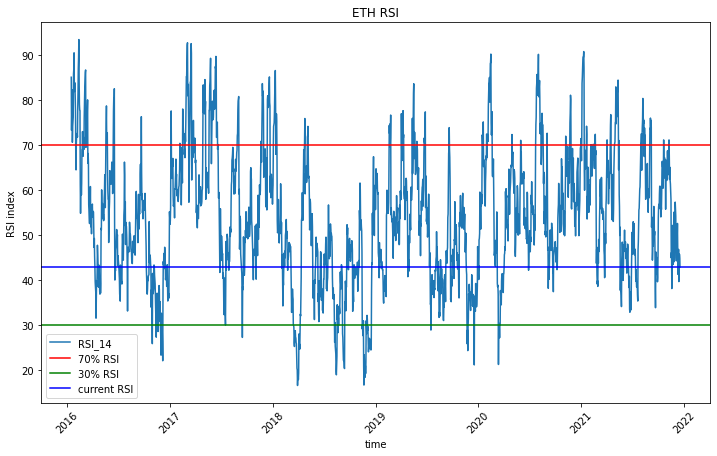

In [4]:
rsi_eth.plot(title = 'ETH RSI', rot=45,figsize=(12,7), ylabel='RSI index')
plt.axhline(70,color='r', label='70% RSI')
plt.axhline(30,color='g', label='30% RSI')
plt.axhline(rsi_eth.iloc[-1], color='b', label='current RSI')
plt.legend(loc='best')

In [5]:
metrics_btc = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/btc_annual_metrics/combined.csv', index_col='time')
metrics_btc = metrics_btc.reset_index()
metrics_btc['time'] = pd.to_datetime(metrics_btc['time']).dt.date
metrics_btc = metrics_btc.set_index('time').drop(columns='Unnamed: 0')

metrics_btc.tail()

,asset,AdrActCnt,CapMVRVCur,CapMrktCurUSD,HashRate,NVTAdj,PriceUSD,SplyCur,TxCnt,TxTfrValAdjUSD,VelCur1yr
time,,,,,,,,,,,
2021-12-13,btc,996713,1.915300,8.842453e+11,1.695883e+08,69.789128,46785.327841,1.890006e+07,281785,1.267024e+10,14.525969
2021-12-14,btc,966596,1.974878,9.127791e+11,1.780076e+08,72.469440,48292.682250,1.890098e+07,281921,1.259537e+10,14.533207
2021-12-15,btc,1058257,1.995927,9.229897e+11,1.695883e+08,62.867727,48830.622386,1.890186e+07,280841,1.468146e+10,14.536127
2021-12-16,btc,873836,1.948720,9.009626e+11,1.383167e+08,56.242508,47663.469108,1.890258e+07,256019,1.601925e+10,14.533316
2021-12-17,btc,979005,1.896527,8.758845e+11,1.792104e+08,48.186258,46334.483749,1.890351e+07,260119,1.817706e+10,14.538415


In [6]:
rsi_btc = pta.rsi(metrics_btc['PriceUSD'],length=14, ).dropna()
rsi_btc
rsi_btc.to_csv('resources/rsi_btc.csv')

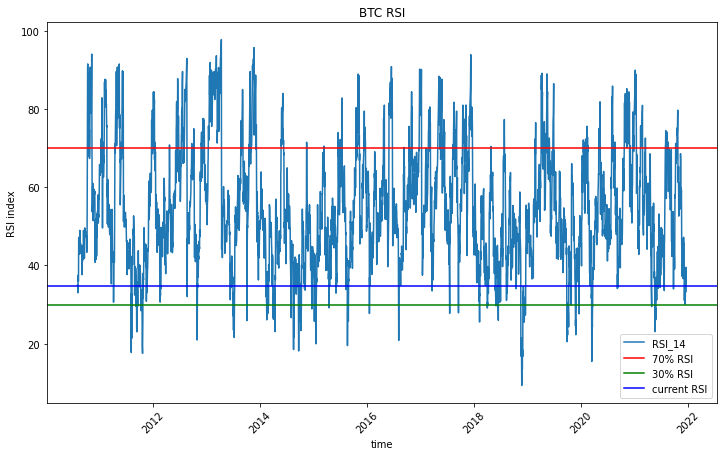

In [7]:
rsi_btc.plot(title = 'BTC RSI', rot=45,figsize=(12,7), ylabel='RSI index')
plt.axhline(70,color='r', label='70% RSI')
plt.axhline(30,color='g', label='30% RSI')
plt.axhline(rsi_btc.iloc[-1], color='b', label='current RSI')
plt.legend(loc='best')

# Rate of Change - ROC

In [8]:
roc_eth = pta.roc(metrics_eth['PriceUSD'],length=14).dropna()
roc_eth.to_csv('resources/roc_eth.csv')
roc_eth.head()

time
2016-01-15    40.257836
2016-01-16    27.558185
2016-01-17    36.974993
2016-01-18    54.341493
2016-01-19    43.544091
Name: ROC_14, dtype: float64

In [9]:
roc_btc = pta.roc(metrics_btc['PriceUSD'],length=14).dropna()
roc_btc.to_csv('resources/roc_btc.csv')
roc_btc.head()


time
2010-08-01   -28.821062
2010-08-02   -25.742574
2010-08-03   -19.700856
2010-08-04   -28.003890
2010-08-05     4.327433
Name: ROC_14, dtype: float64

# Stochastic RSI - STOCHRSI

In [10]:
stochrsi_eth = pta.stochrsi(metrics_eth['PriceUSD'],length=14).dropna()
stochrsi_eth.to_csv('resources/stochrsi_eth.csv')
stochrsi_eth.head()

,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
time,,
2016-02-01,12.255849,30.743114
2016-02-02,7.610820,16.258663
2016-02-03,17.160092,12.342254
2016-02-04,27.179540,17.316817
2016-02-05,29.944141,24.761257


In [11]:
stochrsi_btc = pta.stochrsi(metrics_btc['PriceUSD'],length=14).dropna()
stochrsi_btc.to_csv('resources/stochrsi_btc.csv')
stochrsi_btc.head()

,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
time,,
2010-08-18,88.038824,84.486600
2010-08-19,86.971421,86.645592
2010-08-20,75.822128,83.610791
2010-08-21,70.962850,77.918800
2010-08-22,58.592519,68.459166


# Money Flow Index - MFI

In [12]:
eth_history = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/ETH-USD.csv', parse_dates=True, index_col='Date')
eth_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [13]:
btc_history = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/BTC-USD.csv', parse_dates=True, index_col='Date')
btc_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [14]:
mfi_eth = pta.volume.mfi(eth_history['High'],eth_history['Low'],eth_history['Close'], eth_history['Volume'])
mfi_eth.to_csv('resources/mfi_eth.csv')
mfi_eth.tail()

Date
2022-01-22    31.482715
2022-01-23    31.707864
2022-01-24    31.360048
2022-01-25    30.422699
2022-01-26    30.234930
Name: MFI_14, dtype: float64

In [15]:
mfi_btc = pta.volume.mfi(btc_history['High'],btc_history['Low'],btc_history['Close'], btc_history['Volume'])
mfi_btc.to_csv('resources/mfi_btc.csv')
mfi_btc.tail()

Date
2022-01-22    26.423542
2022-01-23    26.598839
2022-01-24    26.323550
2022-01-25    25.662763
2022-01-26    24.314011
Name: MFI_14, dtype: float64

# Stochastic Oscilator - STOCH

In [16]:
stoch_eth = pta.stoch(eth_history['Close'],eth_history['High'],eth_history['Low'],length=14).dropna()
stoch_eth.to_csv('resources/stoch_eth.csv')
stoch_eth.head()

,STOCHk_14_3_3,STOCHd_14_3_3
Date,,
2017-11-26,76.290256,68.788673
2017-11-27,89.010118,78.137467
2017-11-28,88.764255,84.688210
2017-11-29,81.392237,86.388870
2017-11-30,65.975886,78.710793


In [17]:
stoch_btc = pta.stoch(btc_history['Close'],btc_history['High'],btc_history['Low'],length=14).dropna()
stoch_btc.to_csv('resources/stoch_btc.csv')
stoch_btc.head()

,STOCHk_14_3_3,STOCHd_14_3_3
Date,,
2014-10-04,-37.509344,-25.445139
2014-10-05,-48.047226,-35.980253
2014-10-06,-50.582789,-45.379786
2014-10-07,-39.987669,-46.205895
2014-10-08,-26.924530,-39.164996


# True Strength Index - TSI

In [18]:
tsi_eth = pta.tsi(metrics_eth['PriceUSD']).dropna()
tsi_eth.to_csv('resources/tsi_eth.csv')
tsi_eth.head()

,TSI_13_25_13,TSIs_13_25_13
time,,
2016-02-19,36.723593,55.155104
2016-02-20,33.186631,52.016751
2016-02-21,31.275368,49.053696
2016-02-22,32.410383,46.676080
2016-02-23,33.287523,44.763429


In [19]:
tsi_btc = pta.tsi(metrics_btc['PriceUSD']).dropna()
tsi_btc.to_csv('resources/tsi_btc.csv')
tsi_btc.head()

,TSI_13_25_13,TSIs_13_25_13
time,,
2010-09-05,-18.100723,-17.291109
2010-09-06,-18.088929,-17.405083
2010-09-07,-18.229348,-17.522835
2010-09-08,-18.453034,-17.655721
2010-09-09,-18.570205,-17.786361
